## Eigen-portfolio construction using Principal Component Analysis (PCA)

### PCA via sklearn.decomposition using S&P 500 Index stock data

Welcome to your 2-nd assignment in Unsupervised Machine Learning in Finance.

In this assignment we look in-depth at model-free factor analysis using PCA. By model-free we mean that we do not rely on any factors such as value or momentum to decompose portfolio returns, but instead using Principal Component Analysis (PCA) to deduce structure of portfolio returns.

We work with S&P 500 index stock data. 

## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. You only need to write code between the ### START CODE HERE ### and ### END CODE HERE ### comments. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run Cell" (denoted by a play symbol) in the upper bar of the notebook. 

We will often specify "(≈ X lines of code)" in the comments to tell you about how much code you need to write. It is just a rough estimate, so don't feel bad if your code is longer or shorter.

In [5]:
import os
import os.path
import numpy as np
import datetime

import sys
sys.path.append("..")

try:
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    pass

try:
    import pandas as pd
    print("  pandas: %s"% pd.__version__)
except:
    print("Missing pandas package")

  pandas: 2.2.2


In [6]:
# load dataset
asset_prices = pd.read_csv('spx_holdings_and_spx_closeprice.csv',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0).dropna()
n_stocks_show = 12
print('Asset prices shape', asset_prices.shape)
asset_prices.iloc[:, :n_stocks_show].head()

C:\Users\hassa\AppData\Local\Temp\ipykernel_25992\3846106302.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  asset_prices = pd.read_csv('spx_holdings_and_spx_closeprice.csv',


Asset prices shape (3493, 419)


,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250


In [7]:
print('Last column contains SPX index prices:')
asset_prices.iloc[:, -10:].head()

Last column contains SPX index prices:


,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-27,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457,1398.56
2000-01-28,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742,1360.16
2000-01-31,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722,1394.46
2000-02-01,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151,1409.28
2000-02-02,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192,1409.12


#### Part 1 (Asset Returns Calculation)


Calculate percent returns, also known as simple returns using asse_prices. assign the result to variable asset_returns. Keep only not-nan values in the resulting pandas.DataFrame

Calculate de-meaned returns and scale them by standard deviation $\sigma$. Assign result to normed_returns variable

We now compute stock returns and normalize stock returns data by subtracting the mean and dividing by standard diviation. This normalization is required by PCA.

In [8]:
asset_returns = pd.DataFrame(data=np.zeros(shape=(len(asset_prices.index), asset_prices.shape[1])), 
                             columns=asset_prices.columns.values,
                             index=asset_prices.index)
normed_returns = asset_returns
### START CODE HERE ### (≈ 4 lines of code)
# normed_returns is pandas.DataFrame that should contain normalized returns
asset_returns = asset_prices.pct_change().dropna()

normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()
### END CODE HERE ###


normed_returns.iloc[-5:, -10:].head()

,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2013-12-16,0.852722,0.965219,-1.168885,0.884751,0.095865,0.656639,0.180014,-0.238498,0.465047,0.467931
2013-12-17,0.275173,0.517307,-0.086106,-0.306213,0.589689,-0.118610,-0.549523,0.025268,-0.260013,-0.247921
2013-12-18,0.864485,0.509435,0.600714,1.210605,-0.190024,0.925461,0.756998,0.058428,0.952458,1.252703
2013-12-19,0.210069,0.399574,-0.100159,-0.757419,-0.208023,0.304913,-0.772205,1.544228,-0.167775,-0.056358
2013-12-20,0.827306,0.748420,0.372443,1.048113,0.264046,0.436874,0.320641,-0.740854,0.373717,0.353859


In [11]:
# Fix first instance
part_1 = list(normed_returns.iloc[0, :100].to_numpy().squeeze())

try:
    part1 = " ".join(map(repr, part_1))
except TypeError:
    part1 = repr(part_1)

# Fix second instance
normed_returns.iloc[0, :100].to_numpy().squeeze()

array([-0.19005437, -0.51371017, -2.71470869, -0.04977943,  2.18293305,
       -2.68413088, -0.21246093, -0.76699639, -1.5407309 , -1.80394666,
       -1.37299129, -0.99416907,  0.16136183,  0.72980366,  0.63485621,
       -0.72131907, -0.01302927, -0.80797756,  0.39923062, -0.75893259,
       -1.43444651, -1.12783867, -1.29385343, -0.44802859, -2.13973399,
        0.58949813, -0.87826364,  0.31428572, -1.08060243, -0.31367868,
        0.11819333, -1.8686777 , -1.87275168, -0.22608376, -0.04189121,
       -0.02136145, -0.60458719, -1.43087396, -1.16679677, -1.65594274,
       -0.50493241, -1.5196492 , -0.36359946, -0.58859176, -0.73289901,
        0.87654672, -3.12410596, -1.33977245, -1.33866029, -0.53051976,
       -1.28309222, -2.2171311 ,  1.75785074,  0.22815795, -0.48093428,
       -0.21160476, -1.39163378, -1.8907977 , -1.26523275, -0.90790361,
        1.20007622, -1.13783598, -1.06735573, -1.49029484,  1.65191927,
       -0.94841616,  3.36936561, -0.82344479,  1.76591258,  0.04

In [12]:
train_end = datetime.datetime(2012, 3, 26) 

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (3055, 419)
Test dataset: (437, 419)


Now we compute PCA using all available data. Once we do have PCA computed we fix variance explained at some number and see what is the smallest number of components needed to explain this variance.

#### Part 2 (PCA fitting)
- Calculate covariance matrix using training data set, i.e. **df_train** for all assets.  Assign results to **cov_matrix**.
- Calculate covariance matrix using training data set, i.e. **df_raw_train** for all assets.  Assign results to **cov_matrix_raw**.
- Use scikit-learn PCA to fit PCA model to **cov_matrix**. Assign fitted model to **pca**

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

stock_tickers = normed_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns.values[:-1]
    assert 'SPX' not in stock_tickers, "By accident included SPX index"

    
    # computing PCA on S&P 500 stocks
    cov_matrix = df_train.loc[:, df_train.columns != 'SPX'].cov()    
    pca = PCA().fit(cov_matrix)
    cov_matrix_raw = df_raw_train.loc[:, df_raw_train.columns != 'SPX'].cov()   

    # not normed covariance matrix
    
    ### END CODE HERE ###
    
    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)    
    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

4 components explain 80.00% of variance


In [14]:
part_2 = np.diag(cov_matrix[: 100])
try:
    part2 = " ".join(map(repr, part_2))
except TypeError:
    part2 = repr(part_2)

np.diag(cov_matrix[: 100])

array([1.10446611, 1.09424087, 1.08190134, 1.10517006, 1.06941473,
       1.10597862, 1.11869287, 1.0839399 , 1.09803084, 1.06590728,
       1.07798702, 1.107393  , 1.12418337, 1.10412774, 1.07721126,
       1.11952577, 1.11507312, 1.10687469, 1.04827028, 1.10800935,
       1.10480045, 1.04297489, 1.07466613, 1.12510255, 1.10831513,
       1.09118222, 1.08418296, 1.02668336, 1.09808835, 1.08506552,
       1.08022595, 1.08116796, 1.09591114, 0.99807688, 1.11068716,
       1.01433366, 1.10360906, 1.06598755, 1.11003861, 1.0879927 ,
       1.08236593, 1.093903  , 1.08489115, 1.1050359 , 0.99850151,
       1.08347058, 1.1019318 , 1.08932552, 1.08876911, 1.09560839,
       1.1027858 , 1.09150807, 1.07067427, 1.1119615 , 1.07304668,
       1.10625388, 1.10454709, 1.11531806, 1.06707655, 1.08925028,
       1.07207857, 1.08151718, 1.11539438, 1.09563297, 1.09915349,
       1.10098573, 1.09770417, 1.05315411, 1.08235287, 1.10420203,
       1.10765821, 1.08524638, 1.02531398, 1.10595498, 1.10337

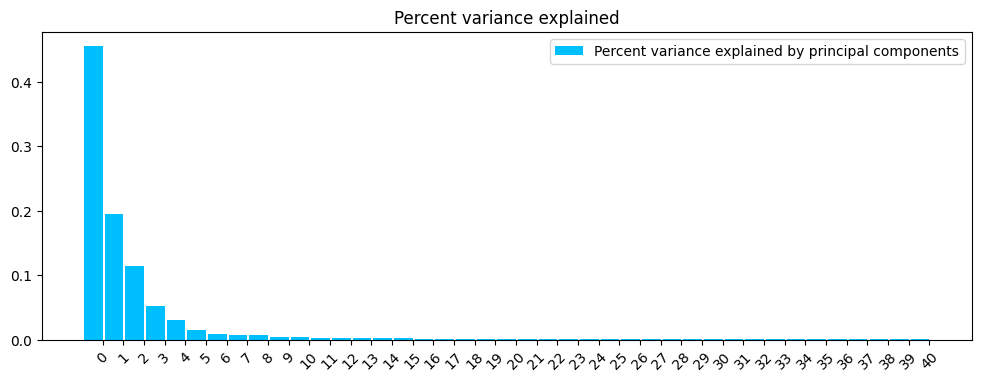

In [15]:
if pca is not None:
    bar_width = 0.9
    n_asset = int((1 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

In [16]:
if pca is not None:
    projected = pca.fit_transform(cov_matrix)

#### Part 3 (Eigen-portfolios construction)

**Instructions:**

We now look a the first two eigen portfolios. We use definition of eigen portfolios as provided by Avellaneda 
http://math.nyu.edu/faculty/avellane/AvellanedaLeeStatArb20090616.pdf

Following Avellaneda we define eigen portfolio weights as:
$$Q_i^{(j)} = \frac{v_i^{(j)}}{\sigma_i}$$

where $j$ is the index of eigen portfolio and $v_i$ is the i-th element of j-th eigen vector.

In the code the pca.components_ are the Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

**Hint:** do not forget to normalize portfolio wieghts such they sum up to 1.

Assign **pc_w** to be weights of the first eigen portfolio.

c:\Users\hassa\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hassa\AppData\Local\Temp\ipykernel_25992\3612313447.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))


Sum of weights of first eigen-portfolio: 100.00


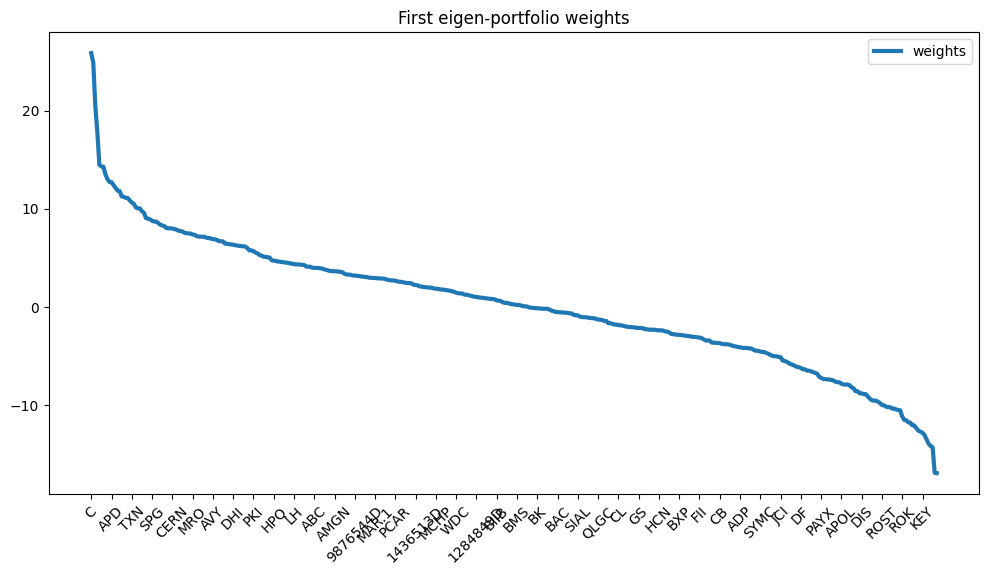

In [17]:
# the first two eigen-portfolio weights# the fi 
# first component
# get the Principal components
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_


    # normalized to 1 
    pc_w = pcs[:, 0] / sum(pcs[:, 0])

    
    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights', 
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

In [18]:
### GRADED PART (DO NOT EDIT) ###
part_3 = list(eigen_prtf1.squeeze().values)
try:
    part3 = " ".join(map(repr, part_3))
except TypeError:
    part3 = repr(part_3)

eigen_prtf1.squeeze().values
### GRADED PART (DO NOT EDIT) ###

array([ 25.85031582,  24.86767434,  20.50560053,  17.82035704,
        14.47730769,  14.30386255,  14.28348915,  13.52096634,
        13.00774666,  12.7320787 ,  12.70691654,  12.40856533,
        12.12452776,  11.83843508,  11.81143847,  11.26871847,
        11.21059407,  11.11600289,  11.09320374,  10.85932057,
        10.63342237,  10.51273921,  10.13725234,  10.04375672,
        10.04123881,   9.75648843,   9.59251618,   9.05022255,
         8.99433054,   8.919185  ,   8.78441009,   8.7008773 ,
         8.6972115 ,   8.55752918,   8.37904971,   8.29982448,
         8.24551451,   8.03442196,   8.01614221,   8.01229527,
         7.98655454,   7.93353269,   7.88011546,   7.76494448,
         7.73572965,   7.68364847,   7.55348265,   7.50832453,
         7.48939127,   7.4736664 ,   7.37866012,   7.35566531,
         7.20970867,   7.16909434,   7.16546963,   7.15201362,
         7.13873899,   7.03747497,   7.01849272,   6.96605378,
         6.91212613,   6.88493177,   6.82765764,   6.70

We sort the first two eigen portfolio weights and plot the results.

c:\Users\hassa\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hassa\AppData\Local\Temp\ipykernel_25992\928490195.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))


Sum of weights of second eigen-portfolio: 100.00


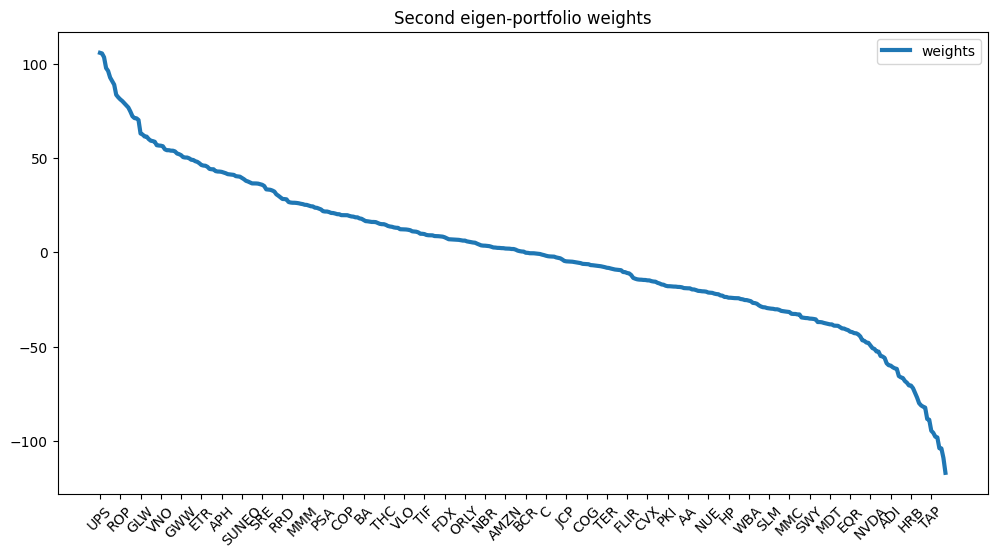

In [19]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_
    

    # normalized to 1 
    pc_w = pcs[:, 1] / sum(pcs[:, 1])


    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

In [21]:
# Fix first instance
part_4 = list(eigen_prtf2.to_numpy().squeeze())
try:
    part4 = " ".join(map(repr, part_4))
except TypeError:
    part4 = repr(part_4)

# Fix second instance 
eigen_prtf2.to_numpy().squeeze()

array([ 105.73517033,  105.39994662,  103.39175275,   97.67256569,
         96.13398698,   92.64212039,   90.75184889,   88.85978692,
         83.477911  ,   82.1520818 ,   81.05293157,   80.15409635,
         79.00194371,   77.84104136,   76.70254394,   74.57265341,
         72.11765047,   71.1204037 ,   71.01786715,   70.10305717,
         62.95525768,   62.4274485 ,   61.37293084,   61.31483173,
         60.03382743,   59.15367207,   58.93221801,   58.57122759,
         56.7522711 ,   56.57796983,   56.48835203,   56.20298556,
         54.58451636,   54.09899493,   54.09200165,   53.8541171 ,
         53.82897906,   53.45164702,   52.34876334,   52.00186609,
         51.46716759,   50.4310064 ,   50.22143785,   50.21009105,
         49.78579026,   49.0456433 ,   48.90998698,   48.26499218,
         47.92390149,   47.20416169,   46.26261419,   45.95765819,
         45.85762349,   45.29289649,   44.19978698,   43.99955603,
         43.98162377,   43.02126747,   42.80745174,   42.76893

#### Part 4 (Compute performance of several eigen portfolios)

**Instructions:**
- Implement sharpe_ratio() function. The function takes ts_returns argument of type pd.Series and returns a tuple of annualized return, annualized vol, and annualized sharpe ratio, where sharpe ratio is defined as annualized return divided by annualized volatility 
- find portfolio (an index into sharpe_metric) that has the highest sharpe ratio

In [22]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio, 
                    where sharpe ratio is defined as annualized return divided by annualized volatility 
                    
    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio
    
    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """
    
    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.
    

    
    annualized_return = ts_returns.mean() * periods_per_year 
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol


    
    return annualized_return, annualized_vol, annualized_sharpe

We compute the annualized return, volatility, and Sharpe ratio of the first two eigen portfolios.

First eigen-portfolio:
Return = 41.76%
Volatility = 27.25%
Sharpe = 1.53


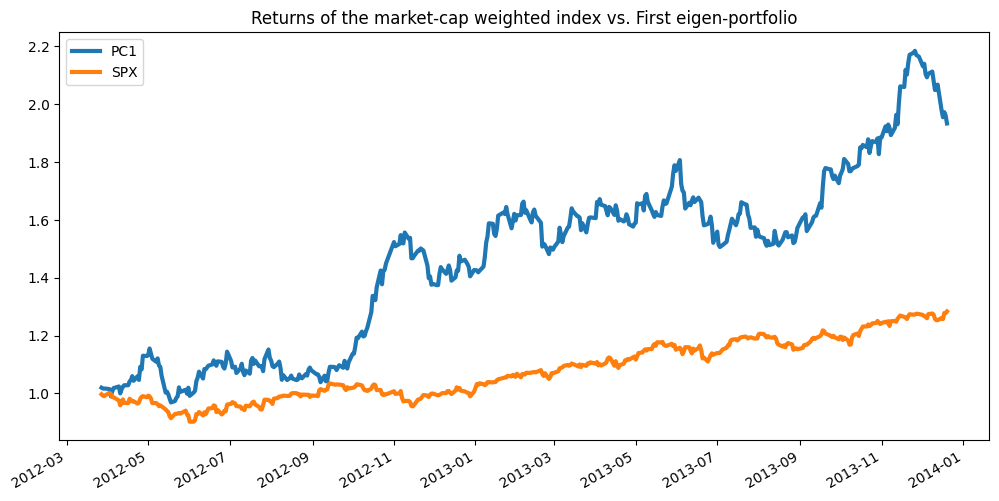

In [23]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)

In [24]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = 72.85%
Volatility = 159.25%
Sharpe = 0.46


We repeat the exercise of computing Sharpe ratio for the first N portfolios and select portfolio with the highest postive Sharpe ratio.

Eigen portfolio #2 with the highest Sharpe. Return 46.39%, vol = 22.21%, Sharpe = 2.09


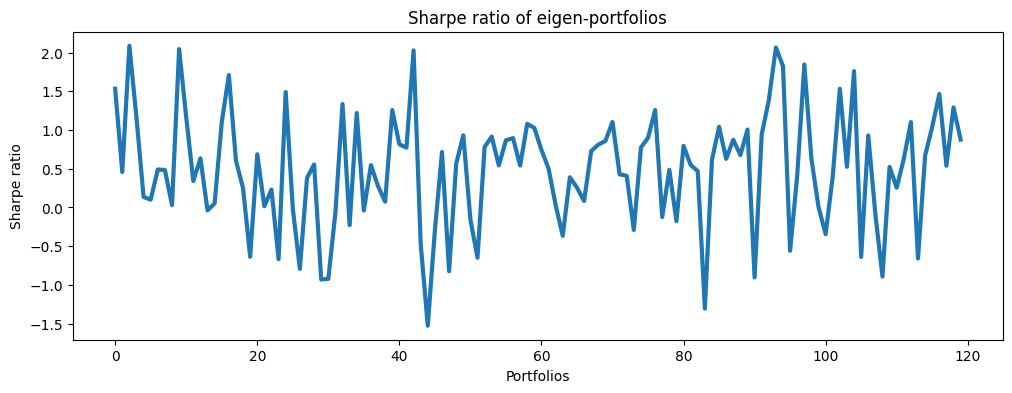

In [25]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio
    
if pca is not None:
    for ix in range(n_portfolios):
        

        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)
        
        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe
    
    
    
    # find portfolio with the highest Sharpe ratio

    idx_highest_sharpe=np.argmax(sharpe_metric)
    
    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100, 
           annualized_vol[idx_highest_sharpe]*100, 
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

In [26]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Vol,Sharpe
2,0.463858,0.222102,2.088489
93,0.425148,0.205874,2.065095
9,0.520023,0.254318,2.044775
42,0.489580,0.241444,2.027716
97,0.722028,0.391036,1.846448
94,0.564529,0.309359,1.824832
104,0.406067,0.230735,1.759881
16,0.382070,0.223514,1.709375
102,0.216601,0.141276,1.533177
0,0.417574,0.272461,1.532600


In [27]:
# Update first instance
part_5 = list(results.iloc[:, 1].to_numpy().squeeze())
try:
    part5 = " ".join(map(repr, part_5))
except TypeError:
    part5 = repr(part_5)

# Update second instance
results.iloc[:, 1].to_numpy().squeeze()

array([2.22102226e-01, 2.05873580e-01, 2.54318134e-01, 2.41444068e-01,
       3.91036013e-01, 3.09359376e-01, 2.30735291e-01, 2.23514201e-01,
       1.41275625e-01, 2.72461171e-01, 3.89229112e-01, 3.22782484e-01,
       2.24148636e-01, 1.70384236e-01, 7.17898497e-01, 3.98119702e+00,
       3.63455531e-01, 6.24385272e-01, 1.61350649e-01, 1.87601475e-01,
       4.89589136e-01, 1.81147068e-01, 2.56778445e-01, 2.50649867e-01,
       5.72115864e+00, 1.68479238e-01, 2.35259719e-01, 3.11167425e-01,
       1.67241265e-01, 1.15385065e+01, 2.31841281e-01, 2.85304071e-01,
       1.99096992e-01, 1.21671369e+00, 1.81650074e-01, 1.75410921e-01,
       7.14194732e+00, 1.88037061e-01, 2.38632709e-01, 1.41819678e+00,
       1.90837629e-01, 1.94815724e-01, 1.76362806e+00, 2.64016634e-01,
       6.96550875e-01, 1.20535421e+00, 4.65931373e-01, 1.43813061e+00,
       3.77254661e-01, 6.21447377e-01, 2.06396431e-01, 2.15674063e-01,
       1.80812549e-01, 1.80954430e-01, 6.60372091e-01, 2.35057304e-01,
      

In [29]:
### GRADED PART (DO NOT EDIT) ###
part6 = str(idx_highest_sharpe)

idx_highest_sharpe


2


=== Portfolio Diversification Analysis ===
                   Herfindahl Index  Effective N  Top 5 Concentration
Eigen-Portfolio 1               1.0          1.0             0.434764
Eigen-Portfolio 2               1.0          1.0             0.596065
Eigen-Portfolio 3               1.0          1.0             0.679151
Eigen-Portfolio 4               1.0          1.0             0.570888
Eigen-Portfolio 5               1.0          1.0             0.620716

=== Key Portfolio Insights ===
1. Explained Variance: First 4 components explain 80.0% of variance
2. Best Performing Portfolio: #2 with Sharpe Ratio of 2.09
3. Portfolio Stability: Average correlation between eigen-portfolios: 0.39


C:\Users\hassa\AppData\Local\Temp\ipykernel_25992\4293266032.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weights_df,


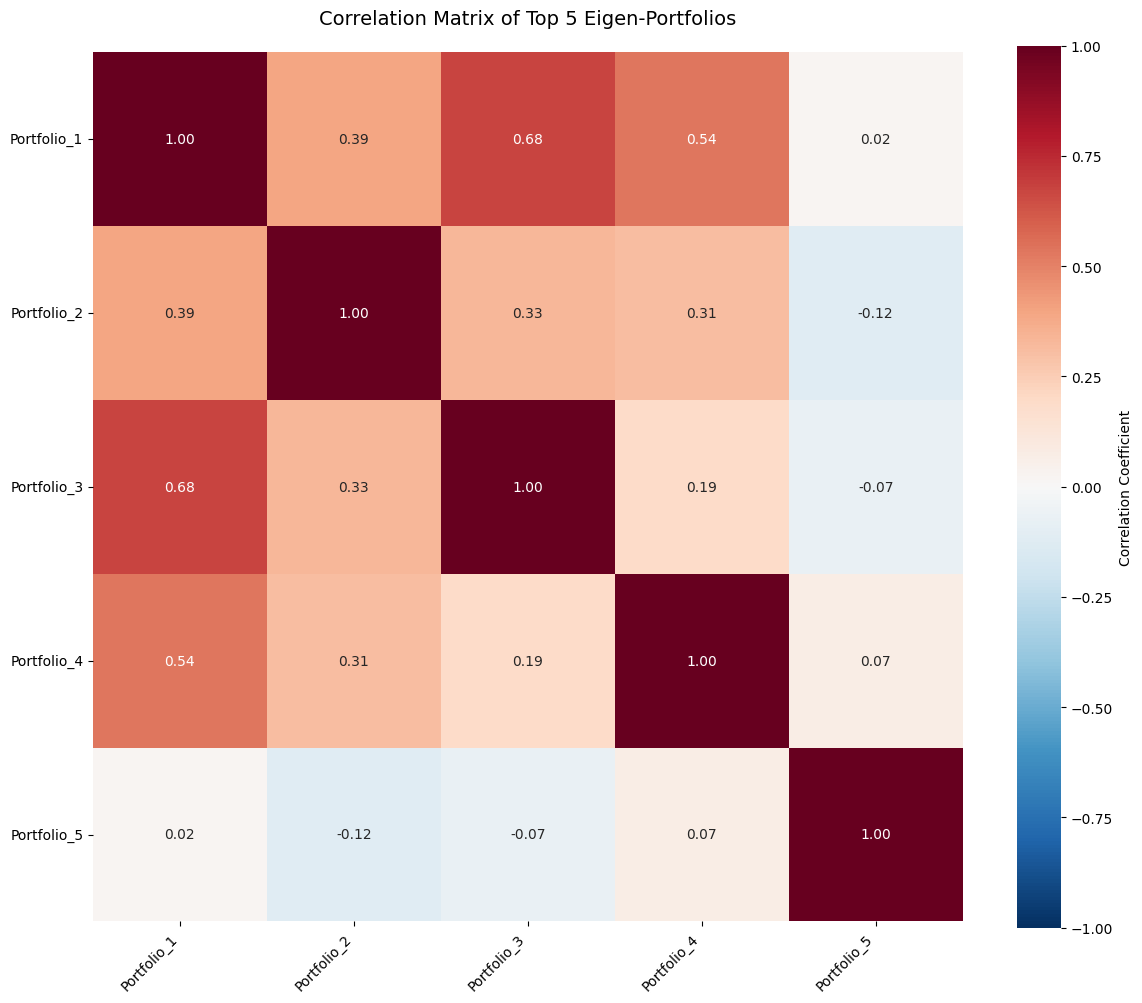

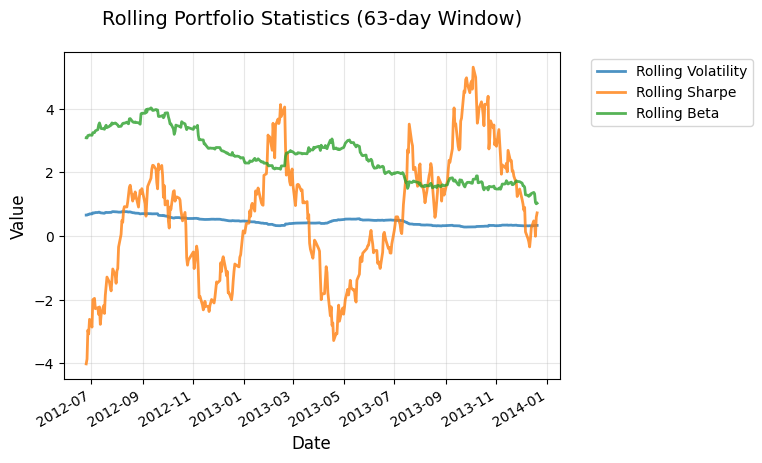

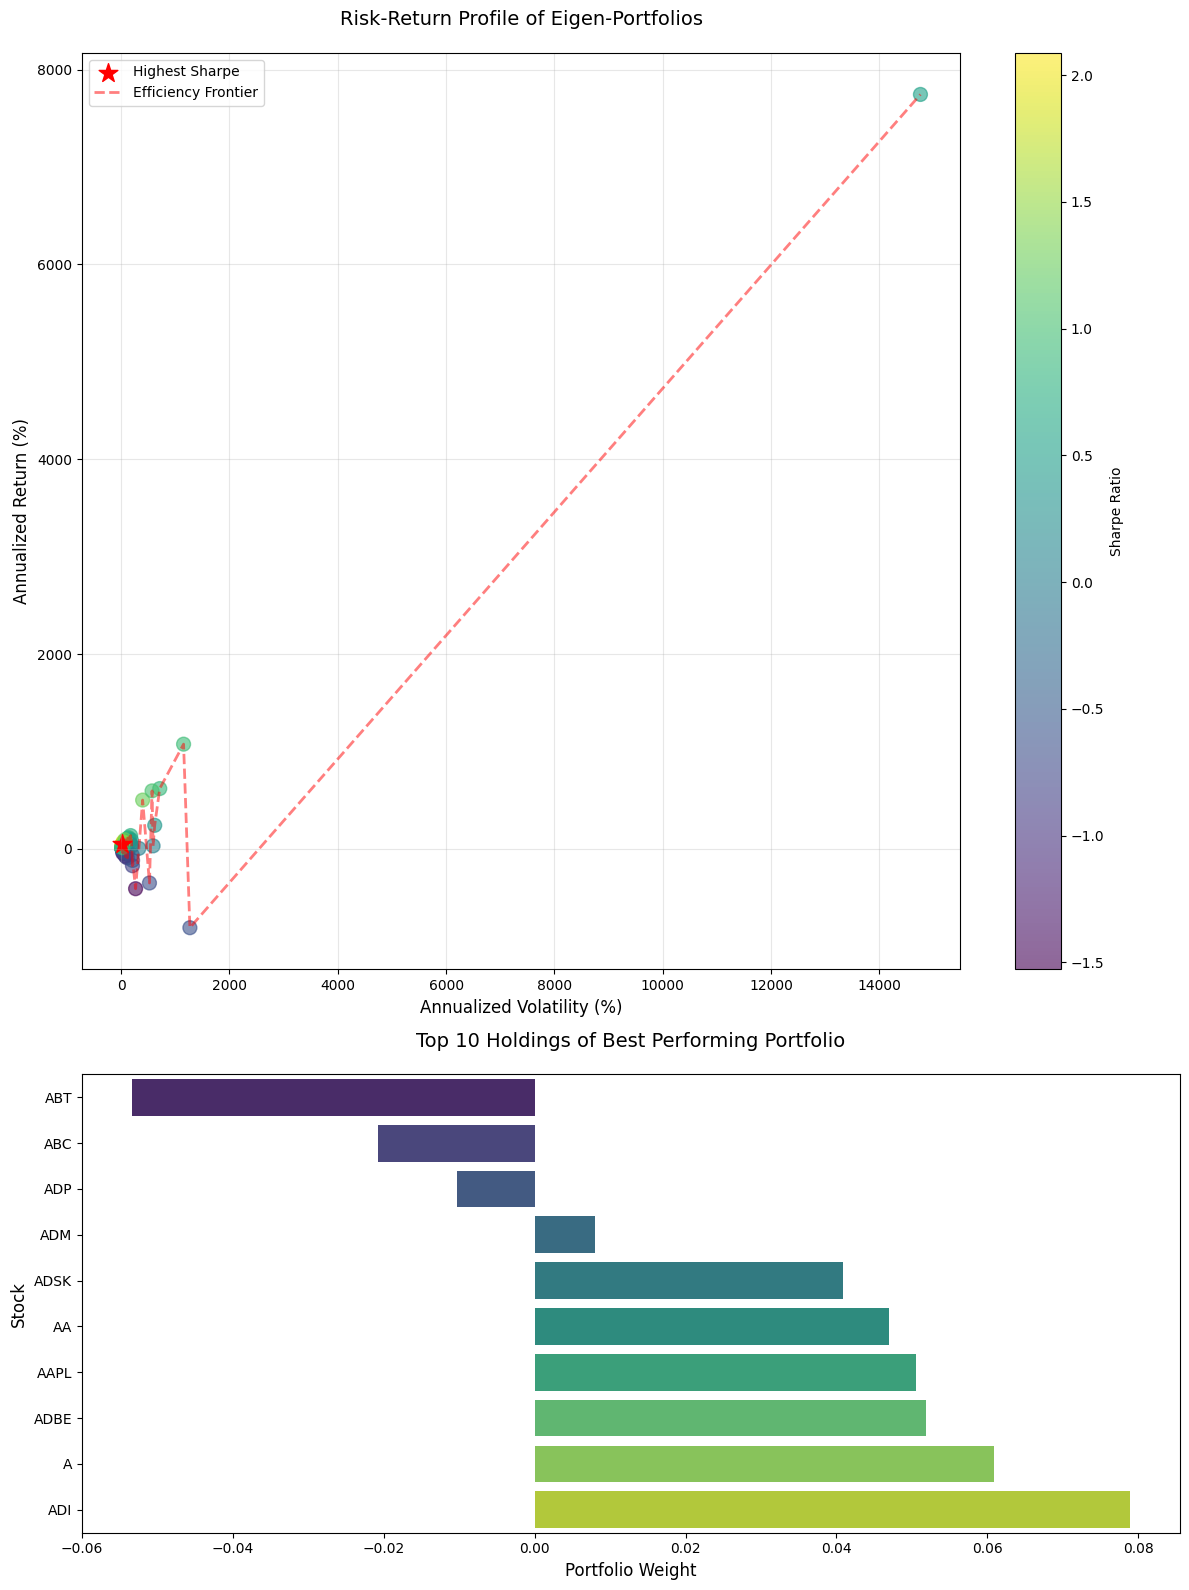

<Figure size 1200x600 with 0 Axes>

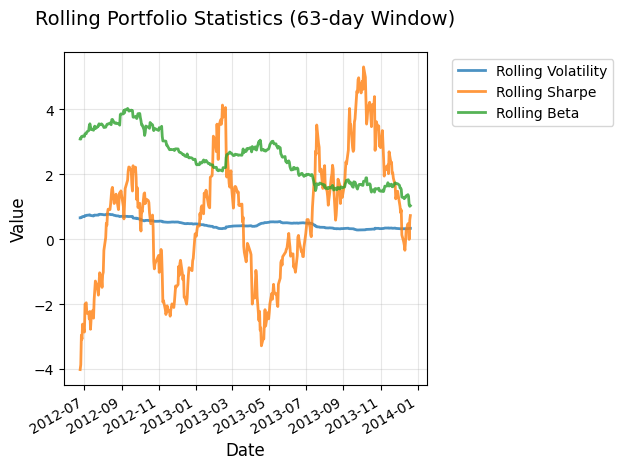

In [52]:
# Add comprehensive summary statistics and analysis insights

import seaborn as sns
from scipy import stats

def generate_portfolio_analytics(df_raw_test, eigen_portfolios, pca, stock_tickers):
    """
    Comprehensive analysis of eigen-portfolios and their relationships with market factors
    
    Parameters:
    df_raw_test: Test dataset with raw returns
    eigen_portfolios: List of eigen-portfolio weights
    pca: Fitted PCA model
    stock_tickers: List of stock tickers
    """
    # 1. Portfolio Diversification Metrics
    def calculate_diversification_metrics(portfolio_weights):
        abs_weights = np.abs(portfolio_weights)
        herfindahl = np.sum(abs_weights**2)
        effective_n = 1/herfindahl
        top_5_concentration = np.sum(np.sort(abs_weights)[-5:])
        return pd.Series({
            'Herfindahl Index': herfindahl,
            'Effective N': effective_n,
            'Top 5 Concentration': top_5_concentration
        })

    # Calculate diversification metrics for each eigen-portfolio
    diversification_metrics = pd.DataFrame([
        calculate_diversification_metrics(pca.components_[i])
        for i in range(5)  # Analyze first 5 eigen-portfolios
    ], index=[f'Eigen-Portfolio {i+1}' for i in range(5)])

    print("\n=== Portfolio Diversification Analysis ===")
    print(diversification_metrics)

    # Calculate eigen-portfolio returns early in the function
    eigen_portfolio_returns = pd.DataFrame()
    for i in range(5):  # First 5 eigen-portfolios
        weights = pca.components_[i]
        normalized_weights = weights / np.sum(weights)
        returns = np.dot(df_raw_test.loc[:, stock_tickers], normalized_weights)
        eigen_portfolio_returns[f'Portfolio_{i+1}'] = returns

    # Calculate correlation matrix once and store it
    corr_matrix = eigen_portfolio_returns.corr()

    # 2. Sector Analysis
    def analyze_sector_exposure(portfolio_weights, sector_mapping):
        sector_exposure = pd.Series(0, index=set(sector_mapping.values))
        for weight, ticker in zip(portfolio_weights, stock_tickers):
            sector = sector_mapping.get(ticker, 'Unknown')
            sector_exposure[sector] += weight
        return sector_exposure

    # 3. Risk Analytics
    def calculate_risk_metrics(returns):
        return pd.Series({
            'Skewness': stats.skew(returns),
            'Kurtosis': stats.kurtosis(returns),
            'VaR (95%)': np.percentile(returns, 5),
            'CVaR (95%)': returns[returns <= np.percentile(returns, 5)].mean(),
            'Max Drawdown': (returns.cumsum() - returns.cumsum().expanding().max()).min()
        })

    # 4.1 Correlation Matrix Visualization
    # Create figure and axis first
    plt.figure(figsize=(12, 10))
    ax = plt.gca()  # Get current axis

    # Now create the heatmap
    sns.heatmap(corr_matrix, 
                ax=ax,
                annot=True,
                fmt='.2f',
                cmap='RdBu_r',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                cbar_kws={'label': 'Correlation Coefficient',
                        'orientation': 'vertical'})

    ax.set_title('Correlation Matrix of Top 5 Eigen-Portfolios', 
                pad=20, 
                fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    plt.tight_layout()        

    # 4.2 Rolling Statistics
    window = 63  # Quarter of trading year
    
    # Calculate returns for the highest Sharpe ratio portfolio
    portfolio_weights = pca.components_[idx_highest_sharpe]
    normalized_weights = portfolio_weights / np.sum(portfolio_weights)
    
    # Calculate portfolio returns
    portfolio_returns = pd.Series(
        np.dot(df_raw_test.loc[:, stock_tickers], normalized_weights),
        index=df_raw_test.index
    )
    
    # Calculate rolling returns and statistics
    rolling_returns = portfolio_returns.rolling(window=window)
    
    rolling_stats = pd.DataFrame({
        'Rolling Volatility': portfolio_returns.rolling(window=window).std() * np.sqrt(252),
        'Rolling Sharpe': (portfolio_returns.rolling(window=window).mean() / 
                          portfolio_returns.rolling(window=window).std()) * np.sqrt(252),
        'Rolling Beta': portfolio_returns.rolling(window=window).cov(df_raw_test['SPX']) / 
                       df_raw_test['SPX'].rolling(window=window).var()
    })

    
    rolling_stats.plot(linewidth=2, alpha=0.8)
    plt.title('Rolling Portfolio Statistics (63-day Window)', pad=20, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 5. Print Summary Insights
    print("\n=== Key Portfolio Insights ===")
    print(f"1. Explained Variance: First {num_comp} components explain {var_threshold*100:.1f}% of variance")
    print(f"2. Best Performing Portfolio: #{idx_highest_sharpe} with Sharpe Ratio of {sharpe_metric[idx_highest_sharpe]:.2f}")
    print(f"3. Portfolio Stability: Average correlation between eigen-portfolios: {corr_matrix.mean().mean():.2f}")
    
    # 6. Risk-Return Scatter Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), height_ratios=[2, 1])
    
    # Risk-Return Scatter Plot
    scatter = ax1.scatter(annualized_vol*100, 
                         annualized_ret*100,
                         c=sharpe_metric,
                         cmap='viridis',
                         s=100,
                         alpha=0.6)
    
    # Add colorbar for Sharpe ratios
    plt.colorbar(scatter, ax=ax1, label='Sharpe Ratio')
    
    # Highlight the portfolio with highest Sharpe ratio
    ax1.scatter(annualized_vol[idx_highest_sharpe]*100,
                annualized_ret[idx_highest_sharpe]*100,
                color='red',
                s=200,
                marker='*',
                label='Highest Sharpe')

    # Add efficiency frontier
    sorted_idx = np.argsort(annualized_vol)
    ax1.plot(np.array(annualized_vol)[sorted_idx]*100,
             np.array(annualized_ret)[sorted_idx]*100,
             'r--',
             linewidth=2,
             alpha=0.5,
             label='Efficiency Frontier')

    ax1.set_xlabel('Annualized Volatility (%)', fontsize=12)
    ax1.set_ylabel('Annualized Return (%)', fontsize=12)
    ax1.set_title('Risk-Return Profile of Eigen-Portfolios', pad=20, fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')

    # Portfolio Weights Distribution
    best_portfolio_weights = pca.components_[idx_highest_sharpe]
    weights_df = pd.DataFrame({
        'Stock': stock_tickers[:10],
        'Weight': best_portfolio_weights[:10]
    }).sort_values('Weight', ascending=True)
    
    sns.barplot(data=weights_df,
                y='Stock',
                x='Weight',
                ax=ax2,
                palette='viridis')
    ax2.set_title('Top 10 Holdings of Best Performing Portfolio', pad=20, fontsize=14)
    ax2.set_xlabel('Portfolio Weight', fontsize=12)
    ax2.set_ylabel('Stock', fontsize=12)

    plt.tight_layout()

    # Figure 3: Rolling Statistics (separate figure)
    plt.figure(figsize=(12, 6))
    rolling_stats.plot(linewidth=2, alpha=0.8)
    plt.title('Rolling Portfolio Statistics (63-day Window)', pad=20, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    return diversification_metrics, rolling_stats

# Execute the analysis
if pca is not None and df_raw_test is not None:
    div_metrics, roll_stats = generate_portfolio_analytics(
        df_raw_test, 
        [eigen_prtf1, eigen_prtf2], 
        pca, 
        stock_tickers
    )
    
    # Save results to CSV for further analysis
    div_metrics.to_csv('portfolio_diversification_metrics.csv')
    roll_stats.to_csv('portfolio_rolling_statistics.csv')